## Isolation Forest for Anomaly Detection
**Objective**: Understand and apply the Isolation Forest algorithm to identify anomalies in datasets.

### Task: Anomaly Detection in Financial Transactions
**Steps**:
1. Import Libraries
2. Load Dataset
3. Apply Isolation Forest
4. Visualize Anomalies

   TransactionAmount  TransactionType  AccountType
0         577.887062                1            1
1         613.041778                1            0
2         720.416033                0            1
3         660.975599                1            0
4         943.574381                1            0


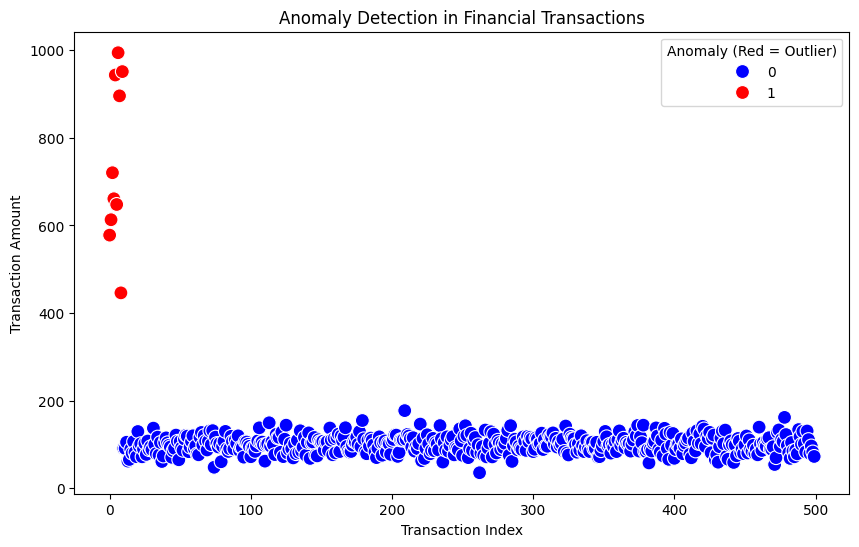

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd

# Setting a random seed for reproducibility
np.random.seed(42)

# Generating synthetic data
n = 500  # Number of transactions

# Randomly generating Transaction Amounts (Normal distribution)
transaction_amount = np.random.normal(loc=100, scale=20, size=n)

# Randomly generating Transaction Types: 0 (Withdrawal), 1 (Deposit)
transaction_type = np.random.choice([0, 1], size=n, p=[0.4, 0.6])

# Randomly generating Account Types: 0 (Checking), 1 (Savings)
account_type = np.random.choice([0, 1], size=n, p=[0.7, 0.3])

# Generating some anomalies (outliers) in the Transaction Amount
anomalies = np.random.uniform(low=300, high=1000, size=10)
transaction_amount[:10] = anomalies  # Adding outliers to the first 10 transactions

# Creating the DataFrame
df = pd.DataFrame({
    'TransactionAmount': transaction_amount,
    'TransactionType': transaction_type,
    'AccountType': account_type
})

# Saving the synthetic dataset to a CSV file
df.to_csv("financial_transactions.csv", index=False)

# Display the first few rows of the dataset
print(df.head())
# Import necessary libraries
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("financial_transactions.csv")

# Step 3: Apply Isolation Forest for Anomaly Detection
# Apply Isolation Forest model to detect anomalies in 'TransactionAmount'
isoforest = IsolationForest(contamination=0.02, random_state=42)  # Expect 2% anomalies
df['Anomaly'] = isoforest.fit_predict(df[['TransactionAmount']])

# Convert the 'Anomaly' column to binary: 1 = Anomaly, 0 = Normal
df['Anomaly'] = df['Anomaly'].map({1: 0, -1: 1})

# Step 4: Visualize Anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y="TransactionAmount", data=df, hue="Anomaly", palette={0: "blue", 1: "red"}, s=100)

plt.title("Anomaly Detection in Financial Transactions")
plt.xlabel("Transaction Index")
plt.ylabel("Transaction Amount")
plt.legend(title="Anomaly (Red = Outlier)")
plt.show()
